In [3]:
import ND_north_star.src.noise_generators.perlin_noise_generator as PNG
# from ND_north_star.src.utils.sampling_function import random_sampler, dual_sampler
from ND_north_star.src.edge_detection.contour_points_2D import generate_boundary_splines


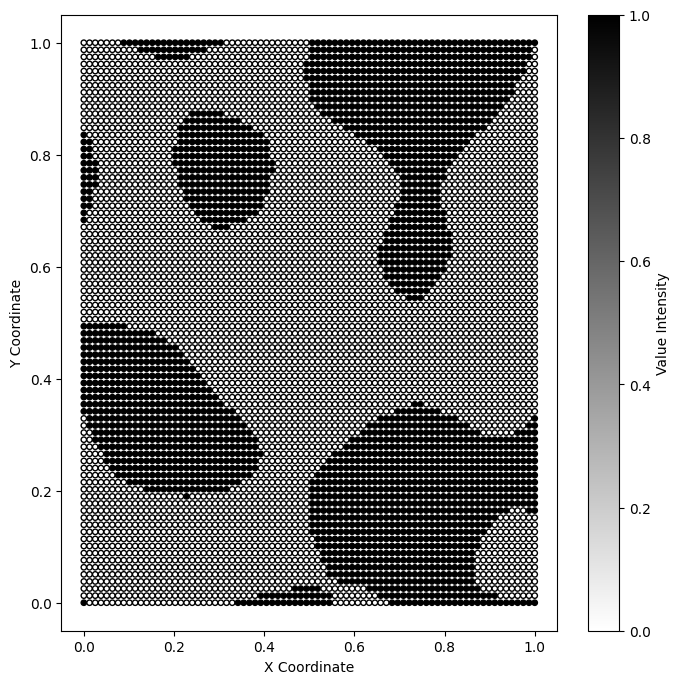

In [4]:
resolution = 80
octave = 3
dimensions = [resolution, resolution]

dataset = PNG.normalized_perlin_data(dimensions, octaves=octave)
PNG.plot_perlin_2D_3D(dataset, 'black')

Skipping boundary -1: Not enough points to fit a spline.


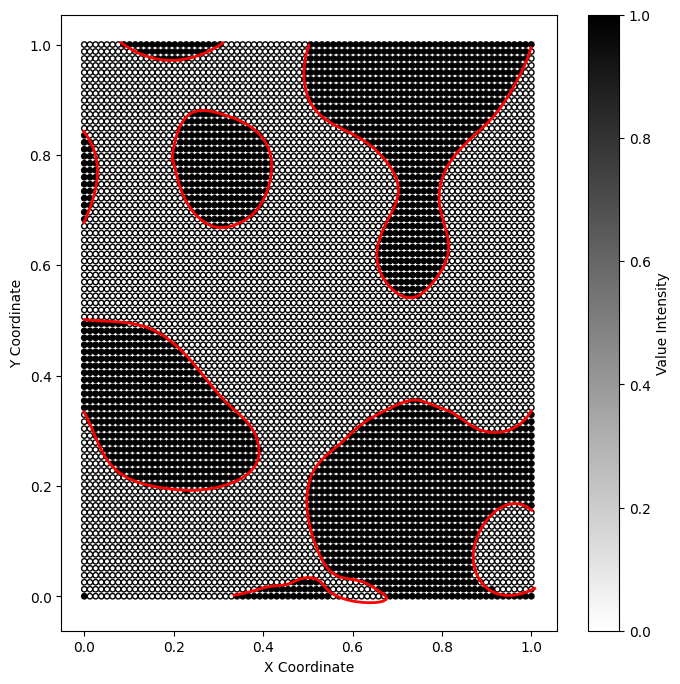

In [5]:
dataset = generate_boundary_splines(dataset, shared_boundary_points = 500)
PNG.plot_perlin_2D_3D(dataset, 'black')

In [11]:
import numpy as np


keys = ['features', 'values', 'octaves', 'resolution', 'boundary_splines']
print(keys)
print(dataset['features'][:10])
print(dataset['values'][:10])
print(dataset['octaves'])
print(dataset['resolution'])

boundary_points = []
for ind, bound_points in dataset['boundary_splines'].items():
    boundary_points.extend(bound_points)
boundary_points = np.array(boundary_points)

# boundary_points = [dataset['boundary_splines'][i] for i in range(len(dataset['boundary_splines']))]
print(boundary_points[:10])
print(len(boundary_points))

['features', 'values', 'octaves', 'resolution', 'boundary_splines']
[[0.0, 0.0], [0.0, 0.012658227848101266], [0.0, 0.02531645569620253], [0.0, 0.0379746835443038], [0.0, 0.05063291139240506], [0.0, 0.06329113924050633], [0.0, 0.0759493670886076], [0.0, 0.08860759493670886], [0.0, 0.10126582278481013], [0.0, 0.11392405063291139]]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3
[80, 80]
[[0.00054556 0.50141733]
 [0.01033234 0.50063006]
 [0.020178   0.50000177]
 [0.03006659 0.49948663]
 [0.03998216 0.49903877]
 [0.04990874 0.49861236]
 [0.05983041 0.49816155]
 [0.06973119 0.49764049]
 [0.07959515 0.49700333]
 [0.08940632 0.49620422]]
500


In [25]:
import pandas as pd

data = dict(zip(keys, [dataset['features'], dataset['values'], dataset['octaves'], dataset['resolution'], boundary_points]))

df = pd.DataFrame([data, data, data])

In [26]:
len(df['boundary_splines'][0])

500

In [27]:
df

,features,values,octaves,resolution,boundary_splines
0,"[[0.0, 0.0], [0.0, 0.012658227848101266], [0.0...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,"[80, 80]","[[0.0005455596418481112, 0.5014173250725371], ..."
1,"[[0.0, 0.0], [0.0, 0.012658227848101266], [0.0...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,"[80, 80]","[[0.0005455596418481112, 0.5014173250725371], ..."
2,"[[0.0, 0.0], [0.0, 0.012658227848101266], [0.0...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,"[80, 80]","[[0.0005455596418481112, 0.5014173250725371], ..."


In [29]:
import xarray as xr
# Convert DataFrame to xarray.Dataset
ds = xr.Dataset.from_dataframe(df)


In [32]:
print(ds)

ValueError: can only convert an array of size 1 to a Python scalar

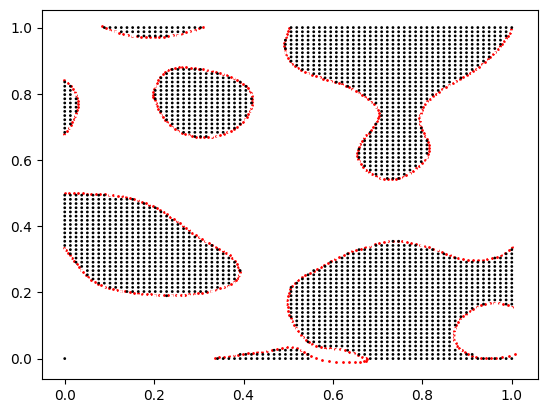

In [7]:
import matplotlib.pyplot as plt

X0, X1, V = np.array(dataset['features'])[:, 0], np.array(dataset['features'])[:, 1], dataset['values']

plt.scatter(boundary_points[:, 0], boundary_points[:, 1], c='red', s=1)
plt.scatter(X0, X1, c=V, s=1, cmap='gray_r')
plt.show()

In [38]:
import numpy as np
import xarray as xr

# Function to generate a simple 2D grayscale image (for example, a gradient)
def generate_image(width, height, index):
    return np.linspace(0, 255, width * height).reshape((height, width)) + index * 10

# Function to generate an additional array of length 500
def generate_array(index):
    return np.random.rand(500) + index

# Parameters
num_images = 5
width, height = 100, 100

# Create a list to store images and arrays
images = [generate_image(width, height, i) for i in range(num_images)]
arrays = [generate_array(i) for i in range(num_images)]

# Stack images into a 3D numpy array
pixel_values = np.stack(images, axis=0)

# Stack arrays into a 2D numpy array
additional_arrays = np.stack(arrays, axis=0)

# Define coordinates
index = np.arange(num_images)
x = np.arange(width)
y = np.arange(height)
array_coord = np.arange(500)

# Create DataArrays
data_array_images = xr.DataArray(pixel_values, coords=[index, y, x], dims=["index", "y", "x"])
data_array_additional = xr.DataArray(additional_arrays, coords=[index, array_coord], dims=["index", "array_coord"])

# Create Dataset and add attributes
dataset = xr.Dataset(
    {
        "grayscale_values": data_array_images,
        "additional_array": data_array_additional
    },
    attrs={
        "resolution": (width, height),
        "name": "example_image_series_with_array"
    }
)


print(dataset)


<xarray.Dataset> Size: 423kB
Dimensions:           (index: 5, y: 100, x: 100, array_coord: 500)
Coordinates:
  * index             (index) int32 20B 0 1 2 3 4
  * y                 (y) int32 400B 0 1 2 3 4 5 6 7 ... 92 93 94 95 96 97 98 99
  * x                 (x) int32 400B 0 1 2 3 4 5 6 7 ... 92 93 94 95 96 97 98 99
  * array_coord       (array_coord) int32 2kB 0 1 2 3 4 ... 495 496 497 498 499
Data variables:
    grayscale_values  (index, y, x) float64 400kB 0.0 0.0255 ... 295.0 295.0
    additional_array  (index, array_coord) float64 20kB 0.5825 0.4893 ... 4.699
Attributes:
    resolution:  (100, 100)
    name:        example_image_series_with_array


In [41]:
print(dataset['index'][0])

<xarray.DataArray 'index' ()> Size: 4B
array(0)
Coordinates:
    index    int32 4B 0
